In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df = pd.read_csv("EasyVisa.csv")
# Print shape of dataset
print(df.shape)


(25480, 12)


In [4]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

features_with_na



[]

In [5]:


df.duplicated().sum()



0

In [6]:


df.drop('case_id', inplace=True, axis=1)



In [7]:


df.head()



,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [8]:


# importing date class from datetime module
from datetime import date
  
# creating the date object of today's date
todays_date = date.today()
current_year= todays_date.year



In [9]:


current_year



2025

In [10]:
df['company_age'] = current_year-df['yr_of_estab']

In [11]:


df.drop('yr_of_estab', inplace=True, axis=1)



In [12]:


X = df.drop('case_status', axis=1)
y = df['case_status']



In [13]:


y.head()



0       Denied
1    Certified
2       Denied
3       Denied
4    Certified
Name: case_status, dtype: object

In [14]:
y = y.apply(lambda x: 1 if x == 'Denied' else 0)


In [15]:
y

0        1
1        0
2        1
3        1
4        0
        ..
25475    0
25476    0
25477    0
25478    0
25479    0
Name: case_status, Length: 25480, dtype: int64

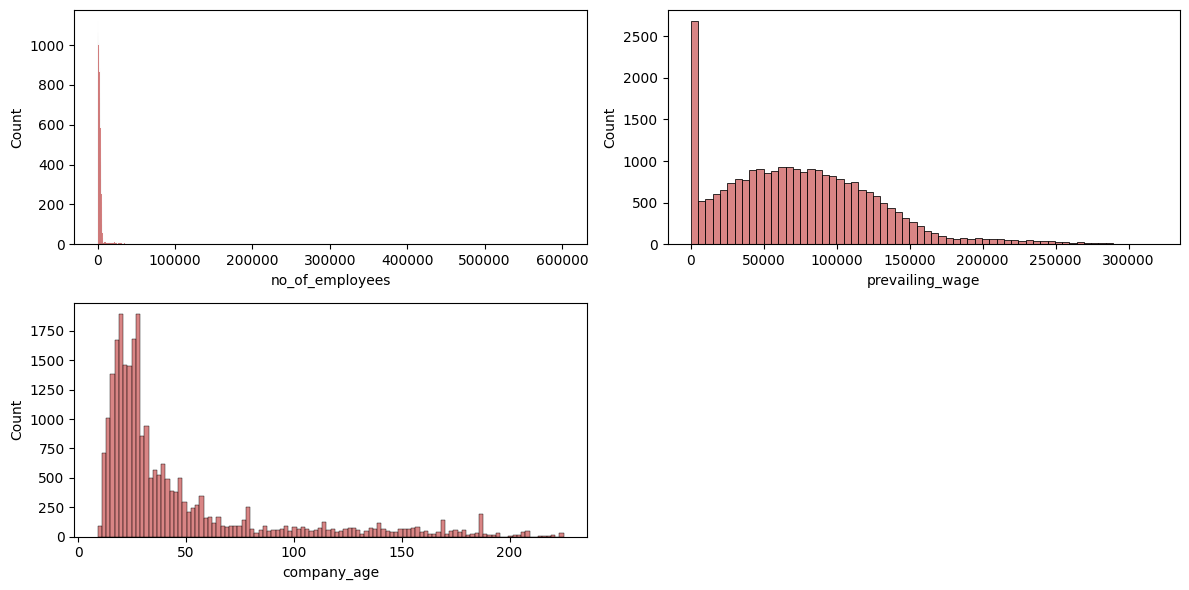

In [16]:
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(['no_of_employees','prevailing_wage','company_age']):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [17]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
transform_features = ['no_of_employees', 'prevailing_wage', 'company_age']
X_transformed = pt.fit_transform(X[transform_features])

X_transformed = pd.DataFrame(X_transformed, columns=transform_features)


In [18]:
import numpy as np

X_log = X[transform_features].apply(lambda x: np.log1p(x))

In [19]:
from scipy.stats.mstats import winsorize

X_winsorized = X[transform_features].apply(lambda x: winsorize(x, limits=[0.01, 0.01]))


In [20]:
X_clipped = X[transform_features].clip(lower=X[transform_features].quantile(0.01),
                                       upper=X[transform_features].quantile(0.99), axis=1)


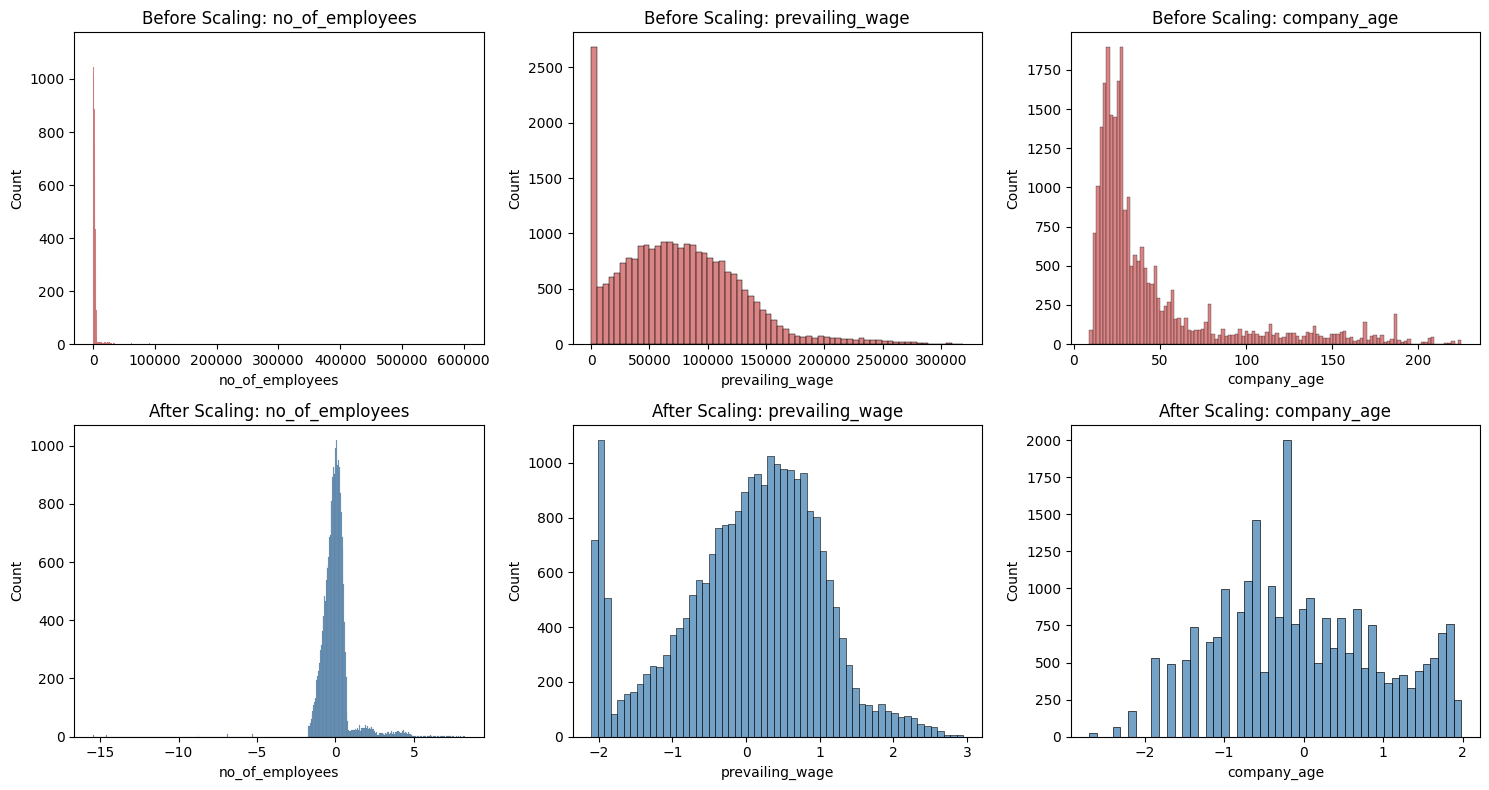

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Original Data
for i, col in enumerate(transform_features):
    sns.histplot(X[col], color='indianred', ax=axes[0, i])
    axes[0, i].set_title(f'Before Scaling: {col}')

# After Transformation (Using PowerTransformer as an Example)
for i, col in enumerate(transform_features):
    sns.histplot(X_transformed[col], color='steelblue', ax=axes[1, i])
    axes[1, i].set_title(f'After Scaling: {col}')

plt.tight_layout()
plt.show()


# 
Feature Encoding and Scaling

One Hot Encoding for Columns which had lesser unique values and not ordinal

    One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

Ordinal Encoding for Columns which has many unique categories

    Ordinal encoding is used here as label encoder is supported for column transformer.
    Ordinal encoding is used for Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.

Standard Scaler

    Standardize features by removing the mean and scaling to unit variance.

Power Transformer

    Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.



In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [25]:
# ✅ Feature Encoding & Scaling Strategy:
- One-Hot Encoding (OHE) → Categorical features with fewer unique values
- Ordinal Encoding → Categorical features with a logical ranking
- Power Transformer (Yeo-Johnson) → Normalize skewed numerical data
- Standard Scaler → Scale numerical features to mean=0, variance=1


SyntaxError: invalid character '→' (U+2192) (3188649006.py, line 2)

In [26]:
# ✅ Define Feature Groups for Preprocessing
num_features = ['no_of_employees', 'prevailing_wage', 'company_age']
ordinal_features = ['has_job_experience', 'requires_job_training', 'full_time_position', 'education_of_employee']
onehot_features = ['continent', 'unit_of_wage', 'region_of_employment']
power_transform_features = ['no_of_employees', 'company_age']

In [28]:

# ✅ Define Transformers
numeric_transformer = StandardScaler()
onehot_transformer = OneHotEncoder(handle_unknown='ignore')
ordinal_transformer = OrdinalEncoder()
power_transformer = Pipeline(steps=[('power', PowerTransformer(method='yeo-johnson'))])


In [29]:
# ✅ Build Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", onehot_transformer, onehot_features),
        ("OrdinalEncoder", ordinal_transformer, ordinal_features),
        ("PowerTransformer", power_transformer, power_transform_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)


In [30]:
# ✅ Apply Transformations
X_transformed = preprocessor.fit_transform(X)

In [31]:

# ✅ Convert to DataFrame
X_transformed_df = pd.DataFrame(X_transformed)

In [32]:

print("Transformed Data Shape:", X_transformed_df.shape)
X_transformed_df.head()

Transformed Data Shape: (25480, 24)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.517300,-0.955551,0.386667,-1.398537,-0.651230
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0,0.030912,-0.467001,-0.142282,0.169835,-0.533211
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2.885076,-1.078363,1.694984,0.919079,-0.674834
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.343550,1.630914,-0.243429,0.169994,1.945186
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,-0.432287,-0.738126,-0.200417,1.428604,-0.604022


In [33]:
num_features

['no_of_employees', 'prevailing_wage', 'company_age']

In [34]:
# Create Column Transformer with 3 types of transformers
or_columns = ['has_job_experience','requires_job_training','full_time_position','education_of_employee']
oh_columns = ['continent','unit_of_wage','region_of_employment']
transform_columns= ['no_of_employees','company_age']

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [35]:
X = preprocessor.fit_transform(X)

X



array([[ 0.        ,  1.        ,  0.        , ...,  0.38666657,
        -1.39853722, -0.65122993],
       [ 0.        ,  1.        ,  0.        , ..., -0.14228155,
         0.1698353 , -0.53321103],
       [ 0.        ,  1.        ,  0.        , ...,  1.69498375,
         0.91907852, -0.6748337 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.19871259,
         1.36027953,  1.63833662],
       [ 0.        ,  1.        ,  0.        , ..., -0.16387483,
         0.22150859,  2.18122353],
       [ 0.        ,  1.        ,  0.        , ..., -0.10805575,
        -0.06776315,  0.45814768]])

In [36]:


from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)



In [37]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape


((13629, 24), (3408, 24))

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [45]:
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


In [46]:

# Function to evaluate classifiers
def evaluate_clf(true, predicted):
    return {
        "Accuracy": accuracy_score(true, predicted),
        "F1 Score": f1_score(true, predicted),
        "Precision": precision_score(true, predicted),
        "Recall": recall_score(true, predicted),
        "ROC AUC": roc_auc_score(true, predicted)
    }

In [47]:
# Define models with hyperparameters
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=5, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, solver='lbfgs'),
    "K-Neighbors Classifier": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    "XGBClassifier": XGBClassifier(n_estimators=150, learning_rate=0.1, max_depth=5, random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "CatBoosting Classifier": CatBoostClassifier(iterations=200, depth=6, learning_rate=0.1, verbose=False),
    "Support Vector Classifier": SVC(kernel='rbf', C=1.0, probability=True),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

In [49]:
# Evaluate models
def evaluate_models(X_train, X_test, y_train, y_test, models):
    report = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        metrics = evaluate_clf(y_test, y_pred)
        report.append({"Model": name, **metrics})
        
        print(f"{name} Performance:")
        for metric, value in metrics.items():
            print(f"- {metric}: {value:.4f}")
        print("="*40, "\n")
    
    return pd.DataFrame(report).sort_values(by="Accuracy", ascending=False)

In [50]:
# Run model evaluation
model_report = evaluate_models(X_train, X_test, y_train, y_test, models)

Random Forest Performance:
- Accuracy: 0.8952
- F1 Score: 0.9042
- Precision: 0.8930
- Recall: 0.9158
- ROC AUC: 0.8935

Decision Tree Performance:
- Accuracy: 0.8932
- F1 Score: 0.9002
- Precision: 0.9086
- Recall: 0.8918
- ROC AUC: 0.8933

Gradient Boosting Performance:
- Accuracy: 0.9155
- F1 Score: 0.9214
- Precision: 0.9259
- Recall: 0.9168
- ROC AUC: 0.9154

Logistic Regression Performance:
- Accuracy: 0.7256
- F1 Score: 0.7411
- Precision: 0.7555
- Recall: 0.7272
- ROC AUC: 0.7255

K-Neighbors Classifier Performance:
- Accuracy: 0.9416
- F1 Score: 0.9467
- Precision: 0.9339
- Recall: 0.9598
- ROC AUC: 0.9400

XGBClassifier Performance:
- Accuracy: 0.9126
- F1 Score: 0.9182
- Precision: 0.9274
- Recall: 0.9092
- ROC AUC: 0.9128

CatBoosting Classifier Performance:
- Accuracy: 0.9149
- F1 Score: 0.9206
- Precision: 0.9272
- Recall: 0.9141
- ROC AUC: 0.9150

Support Vector Classifier Performance:
- Accuracy: 0.8571
- F1 Score: 0.8678
- Precision: 0.8671
- Recall: 0.8685
- ROC AUC: 

In [54]:
import pandas as pd
import joblib
import json
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Preserve feature names first
feature_names = X_res.columns.tolist()

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
# Function to evaluate classifiers
def evaluate_clf(true, predicted):
    return {
        "Accuracy": accuracy_score(true, predicted),
        "F1 Score": f1_score(true, predicted),
        "Precision": precision_score(true, predicted),
        "Recall": recall_score(true, predicted),
        "ROC AUC": roc_auc_score(true, predicted)
    }

# Define models with hyperparameters
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=5, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, solver='lbfgs'),
    "K-Neighbors Classifier": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    "XGBClassifier": XGBClassifier(n_estimators=150, learning_rate=0.1, max_depth=5, random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "CatBoosting Classifier": CatBoostClassifier(iterations=200, depth=6, learning_rate=0.1, verbose=False),
    "Support Vector Classifier": SVC(kernel='rbf', C=1.0, probability=True),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Evaluate models and find the best one
def evaluate_and_save_best_model(X_train, X_test, y_train, y_test, models):
    best_model = None
    best_score = 0
    best_model_name = ""
    best_hyperparams = {}
    best_features = list(X_train.columns)

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        metrics = evaluate_clf(y_test, y_pred)

        print(f"{name} Performance:")
        for metric, value in metrics.items():
            print(f"- {metric}: {value:.4f}")
        print("=" * 40, "\n")

        if metrics["Accuracy"] > best_score:
            best_score = metrics["Accuracy"]
            best_model = model
            best_model_name = name
            best_hyperparams = model.get_params()

    # Save the best model using joblib
    if best_model:
        joblib.dump(best_model, f"best_model_{best_model_name}.pkl")
        print(f"Best model '{best_model_name}' saved as best_model_{best_model_name}.pkl")

        # Save model metadata
        metadata = {
            "model_name": best_model_name,
            "accuracy": best_score,
            "hyperparameters": best_hyperparams,
            "features": best_features
        }

        with open(f"best_model_{best_model_name}_metadata.json", "w") as f:
            json.dump(metadata, f, indent=4)
        print(f"Metadata saved in best_model_{best_model_name}_metadata.json")

    return best_model_name, best_score

# Run evaluation with feature names
best_model_name, best_score = evaluate_and_save_best_model(
    X_train, X_test, y_train, y_test, models, feature_names
)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'